#Import and Header

In [94]:
!pip install ftfy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.2 MB/s eta 0:00:00


In [95]:
import ftfy
import bs4 as bs
import urllib.request
import json
import pandas as pd
import time
from urllib.parse import urljoin
import pandas as pd
import time
from bs4 import BeautifulSoup
import json
from google.colab import files
import requests


In [96]:

headers = {
    "User-Agent": "DKU-SOSC314",
    "Accept": "application/json",
}

#Scraping N1 Website

From the html of the website it can be found that the urls for all pages in the news category of the n1 website are "https://n1info.rs/vesti/x/" where x is the number of the page.

For example:

"https://n1info.rs/vesti/2/"

From data we can see that the "hasPart" part is the one which includes information about the articles

Applying ftfy to make the text in the headline contain Serbian letters instead of

In [ ]:
df= pd.DataFrame()

In [ ]:


for i in range(1000,2000): #start and end page

  url = "https://n1info.rs/vesti/"+str(i)+"/"
  r = requests.get(url, headers=headers, timeout=20)
  r.encoding = "utf-8"
  html= r.text
  time.sleep(2)
  soup=BeautifulSoup(html, "html.parser")
  json_script=soup.select('script[type="application/ld+json"]')
  for strings in json_script:
        try:
            data = json.loads(strings.string)
        except json.JSONDecodeError:
            continue
  df= pd.concat([df, pd.DataFrame(data["hasPart"])], ignore_index=True)
  df.to_csv("articles.csv", index=False, encoding="utf-8-sig")

  print(df['datePublished'].iloc[-2:-1],i)



13358    2025-04-29T19:01:31+00:00
Name: datePublished, dtype: object 1000
13378    2025-04-29T15:01:37+00:00
Name: datePublished, dtype: object 1001
13398    2025-04-29T11:56:19+00:00
Name: datePublished, dtype: object 1002
13418    2025-04-29T09:21:53+00:00
Name: datePublished, dtype: object 1003
13438    2025-04-28T07:05:33+00:00
Name: datePublished, dtype: object 1004
13458    2025-04-28T16:53:12+00:00
Name: datePublished, dtype: object 1005
13478    2025-04-28T13:59:20+00:00
Name: datePublished, dtype: object 1006
13498    2025-04-28T11:45:03+00:00
Name: datePublished, dtype: object 1007
13518    2025-04-27T13:27:18+00:00
Name: datePublished, dtype: object 1008
13538    2025-04-28T06:13:40+00:00
Name: datePublished, dtype: object 1009
13558    2025-04-27T17:40:04+00:00
Name: datePublished, dtype: object 1010
13578    2025-04-27T10:48:00+00:00
Name: datePublished, dtype: object 1011
13598    2025-04-26T19:23:36+00:00
Name: datePublished, dtype: object 1012
13618    2025-04-26T10:55

#Making a Graph

In [ ]:
df["datePublished"] = pd.to_datetime(df["datePublished"], format="mixed", utc=True, errors="coerce")


In [ ]:
date_count={}
for i in df["datePublished"]:
  if pd.isna(i):
        continue
  if str(i.date()) not in date_count:
    date_count[str(i.date())]=1
  else:
     date_count[str(i.date())]+=1
date_count

{'2025-10-22': 50,
 '2025-10-21': 95,
 '2025-10-20': 97,
 '2025-10-19': 48,
 '2025-10-18': 54,
 '2025-10-17': 85,
 '2025-10-16': 86,
 '2025-10-15': 101,
 '2025-10-14': 82,
 '2025-10-13': 68,
 '2025-10-12': 42,
 '2025-10-11': 52,
 '2025-10-10': 62,
 '2025-10-09': 68,
 '2025-10-08': 76,
 '2025-10-07': 70,
 '2025-10-06': 67,
 '2025-10-05': 60,
 '2025-09-28': 64,
 '2025-10-04': 36,
 '2025-10-03': 94,
 '2025-10-02': 86,
 '2025-10-01': 89,
 '2025-09-30': 85,
 '2025-09-29': 95,
 '2025-09-27': 42,
 '2025-09-26': 71,
 '2025-09-25': 70,
 '2025-09-24': 78,
 '2025-09-23': 83,
 '2025-09-22': 65,
 '2025-09-21': 33,
 '2025-09-20': 35,
 '2025-09-19': 76,
 '2025-09-18': 79,
 '2025-09-17': 86,
 '2025-09-16': 79,
 '2025-09-15': 79,
 '2025-09-14': 41,
 '2025-09-13': 47,
 '2025-09-12': 84,
 '2025-09-11': 85,
 '2025-09-10': 71,
 '2025-09-09': 86,
 '2025-09-08': 77,
 '2025-09-07': 48,
 '2025-09-06': 62,
 '2025-09-05': 96,
 '2025-09-04': 82,
 '2025-09-03': 73,
 '2025-09-02': 81,
 '2025-09-01': 65,
 '2025-08-3

In [ ]:
dates=[]
count=[]
for i in date_count.items():
  dates.append(i[0])
  count.append(i[1])

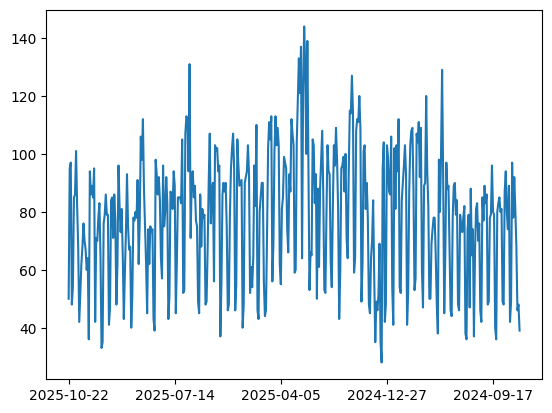

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



plt.plot(dates,count)
step=100
#to only show every fifth date so that it's not too crowded
plt.xticks([dates[i] for i in range(0, len(dates), step)])
plt.show()


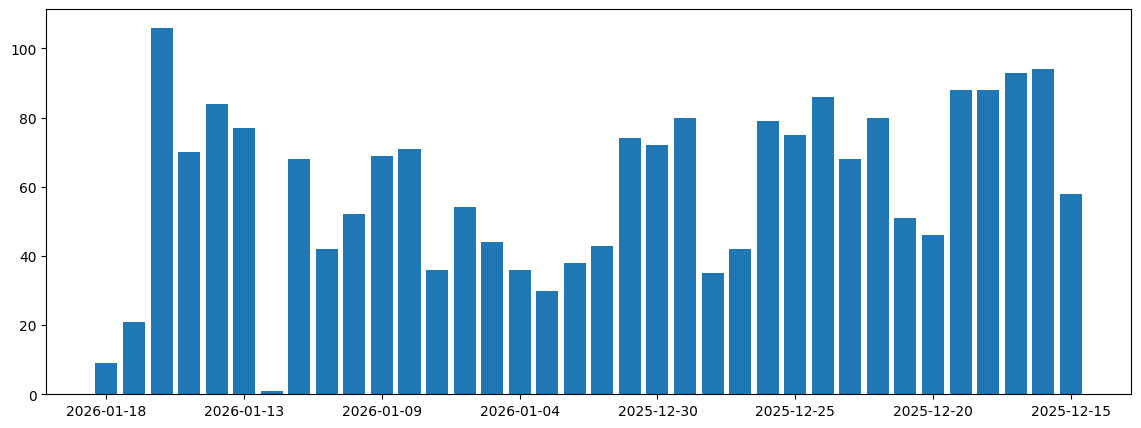

In [ ]:
plt.figure(figsize=(14, 5))
plt.bar(dates, count)
step=5
#to only show every fifth date so that it's not too crowded
plt.xticks([dates[i] for i in range(0, len(dates), step)])
plt.show()

#Scraping RTS Wrbsite

In [79]:
rts_df= pd.DataFrame()

In [82]:
for i in range(223,351): #start and end page

  url = "https://www.rts.rs/lat/vesti/politika.html?position="+str(i)
  r = requests.get(url, headers=headers, timeout=20)
  r.encoding = "utf-8"
  html= r.text
  soup=BeautifulSoup(html, "html.parser")
  time.sleep(2)
  articles=[]
  rts_url="https://www.rts.rs"
  for el in soup.select("div.element"):

      a=el.select_one('a.largeThumb[href]')


      url= urljoin(rts_url,a.get("href"))
      date= el.select_one("p.dateTime").get_text()
      title= a.get("title")

      articles.append({

              "headline": title,
              "url": url,
              "datePublished": date,
          })
  rts_df= pd.concat([rts_df, pd.DataFrame(articles)], ignore_index=True)
  print(rts_df['datePublished'].iloc[-2:-1],i)
  rts_df.to_csv("rts_articles.csv", index=False, encoding="utf-8-sig")





18    понедељак, 14. апр 2025, 09:30 -> 11:24
Name: datePublished, dtype: object 223
28    недеља, 13. апр 2025, 09:20 -> 10:10
Name: datePublished, dtype: object 224
38    петак, 11. апр 2025, 15:05 -> 15:12
Name: datePublished, dtype: object 225
48    четвртак, 10. апр 2025, 09:18 -> 09:20
Name: datePublished, dtype: object 226
58    уторак, 08. апр 2025, 15:15 -> 15:47
Name: datePublished, dtype: object 227
68    понедељак, 07. апр 2025, 15:48 -> 16:05
Name: datePublished, dtype: object 228
78    недеља, 06. апр 2025, 20:00 -> 20:46
Name: datePublished, dtype: object 229
88    петак, 04. апр 2025, 16:35 -> 18:54
Name: datePublished, dtype: object 230
98    среда, 02. апр 2025, 19:58 -> 11:59
Name: datePublished, dtype: object 231
108    уторак, 01. апр 2025, 16:40 -> 16:43
Name: datePublished, dtype: object 232
118    субота, 29. мар 2025, 13:07 -> 16:42
Name: datePublished, dtype: object 233
128    четвртак, 27. мар 2025, 16:32 -> 16:58
Name: datePublished, dtype: object 234
138   

#Combining csv files

In [84]:


n1 = pd.read_csv("N1_articles.csv")

In [85]:
n1 = pd.concat([n1, df], ignore_index=True)

In [87]:
n1.to_csv("n1.csv", index=False, encoding="utf-8-sig")

In [88]:
n1 = n1.drop(columns=n1.columns[0])

In [89]:
n1

,headline,url,datePublished,author
0,Iskliznuli vagoni kod Kosjerića i dalje stoje ...,/vesti/iskliznuli-vagoni-kod-kosjerica-i-dalje...,2026-01-18 10:33:05.157429+00:00,"{'@type': 'Person', 'name': 'N1 Beograd'}"
1,Roditelji zabrinuti za bezbednost dece u hali ...,/vesti/roditelji-zabrinuti-za-bezbednost-dece-...,2026-01-18 10:21:34.757353+00:00,"{'@type': 'Person', 'name': 'N1 Beograd'}"
2,Novi DSS neće na sastanak s evroparlamentarcim...,/vesti/novi-dss-nece-na-sastanak-s-evroparlame...,2026-01-18 10:03:18.076653+00:00,"{'@type': 'Person', 'name': 'Beta '}"
3,Poskupele auto-škole u Nišu: Da li je cena od ...,/vesti/poskupele-auto-skole-u-nisu-kakva-je-si...,2026-01-18 09:11:13.590901+00:00,"{'@type': 'Person', 'name': 'N1 Beograd'}"
4,Ministarstvo razmatra skraćenje časova na 30 m...,/vesti/ministarstvo-prosvete-skracivanje-casov...,2026-01-18 08:38:44.004672+00:00,"{'@type': 'Person', 'name': 'Beta '}"
...,...,...,...,...
39495,"Nastavljeno suđenje za masovno ubistvo u ""Ribn...",/vesti/nastavljeno-sudjenje-za-masovno-ubistvo...,2024-08-23 12:39:58+00:00,"{'@type': 'Person', 'name': 'RTS '}"
39496,"Otvoreni ""Dani šljive"" u Blacu",/vesti/otvoreni-dani-sljive-u-blacu/,2024-08-23 12:27:27+00:00,"{'@type': 'Person', 'name': 'Beta '}"
39497,Obezbeđen smeštaj za migrante spasene posle pr...,/vesti/obezbedjen-smestaj-za-migrante-spasene-...,2024-08-23 12:12:21+00:00,"{'@type': 'Person', 'name': 'Beta '}"
39498,Novopazarski komunalci procesuirali više od 20...,/vesti/novopazarski-komunalci-procesuirali-vis...,2024-08-23 12:06:54+00:00,"{'@type': 'Person', 'name': 'Beta '}"


In [90]:
rts= pd.read_csv("rts.csv")

In [91]:
rts = pd.concat([rts, rts_df], ignore_index=True)

In [92]:
rts

,headline,url,datePublished
0,Случај,https://www.rts.rs/vesti/politika/5868101/sluc...,"петак, 16. јан 2026, 13:45 -> 14:12"
1,Ђурић са Соренсеном: Испуњење свих договорених...,https://www.rts.rs/vesti/politika/5868078/djur...,"петак, 16. јан 2026, 13:29 -> 13:36"
2,"Вучић: Нису лаки разговори са МОЛ-ом, верујем ...",https://www.rts.rs/vesti/politika/5867944/vuci...,"петак, 16. јан 2026, 12:10 -> 15:40"
3,Гогић: Дијалог Београда и Приштине у слободном...,https://www.rts.rs/vesti/politika/5867711/dija...,"петак, 16. јан 2026, 09:30 -> 09:36"
4,Осам година од убиства Оливера Ивановића – ода...,https://www.rts.rs/vesti/politika/5867702/godi...,"петак, 16. јан 2026, 07:28 -> 17:43"
...,...,...,...
3395,Вучевић присуствовао инаугурацији председника ...,https://www.rts.rs/vesti/politika/5560236/vuce...,"недеља, 20. окт 2024, 09:20 -> 09:59"
3396,Председник Вучић гост РТС-а сутра у 20 часова,https://www.rts.rs/vesti/politika/5560209/pred...,"недеља, 20. окт 2024, 08:09 -> 08:09"
3397,Ухапшен мушкарац осумњичен за напад на породиц...,https://www.rts.rs/vesti/politika/5560164/poro...,"субота, 19. окт 2024, 22:36 -> 23:32"
3398,Вучић и Путин сутра ће разговарати телефоном,https://www.rts.rs/vesti/politika/5560116/alek...,"субота, 19. окт 2024, 21:08 -> 21:46"


In [93]:
rts.to_csv("rts.csv", index=False, encoding="utf-8-sig")